In [127]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [128]:
from pandas import read_csv
data = read_csv('Model_D.csv', header=0, delimiter=';')

In [129]:
if 'ppnnr' in data:
	data = data.drop(['ppnnr'], axis='columns')
# if 'DatInfo' in data:
# 	data = data.drop(['DatInfo'],axis='columns')
# if 'Datbloed' in data:
# 	data = data.drop(['Datbloed'],axis='columns')
# if 'DatMRI' in data:
# 	data = data.drop(['DatMRI'],axis='columns')
# if 'Symp_Inf_code' in data:
# 	data = data.drop(['Symp_Inf_code'],axis='columns')	
#if 'Symp_Inf_aanw' in data:
#	data = data.drop(['Symp_Inf_aanw'], axis='columns')
#if 'PF4' in data:
#	data = data.drop(['PF4'], axis='columns')
#if 'MPO' in data:
#	data = data.drop(['MPO'], axis='columns')
#if 'fractalkine' in data:
#	data = data.drop(['fractalkine'], axis='columns')
#if 'B-TG' in data:
#	data = data.drop(['B-TG'], axis='columns')

In [130]:
data = data.dropna()
data.head()

,Group,geslacht,leeftijd,BMI,SBP,DBP,Coronairl,Hypertensie,DM,Hyperchol,...,WMH_PVD_ext,PVS_BG_ext,PVS_CS_ext,MB_totaal_aanw,PF4,MPO,Fractalkine,B-TG,DNA-MPO,S100A8/A9
0,1,1,78,27.968016,147.5,83.5,0,0,0,1,...,1.0,1.0,1.0,0.0,579.617796,50.930128,0.00000,649.604336,2.603638,370.576566
1,1,2,65,22.656250,133.5,84.0,0,1,0,1,...,1.0,0.0,1.0,0.0,1476.815336,69.737767,0.00000,838.501862,1.700917,457.971595
2,1,2,55,31.202564,182.0,113.0,0,1,0,1,...,0.0,0.0,1.0,0.0,1069.126605,37.032702,0.00000,400.040008,3.225035,469.090441
3,1,1,46,32.824138,152.5,93.5,1,1,0,1,...,0.0,0.0,1.0,0.0,791.899402,286.256432,0.68914,795.610229,1.405755,404.603012
4,1,1,63,25.689562,140.0,82.5,0,0,0,1,...,0.0,0.0,1.0,0.0,563.766732,80.222767,0.00000,585.001695,2.226686,238.159000


In [131]:
data['Group'].replace({2: 1}, inplace=True)
data['Group'].replace({3: 2}, inplace=True)
data.head()
print(data['Group'].value_counts())

1    78
2    36
Name: Group, dtype: int64


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Group'],axis='columns'),data['Group'],test_size=0.2)


## The code below is specific for DataSet A:

In [133]:
X_train_A = X_train.drop(['S100A8/A9', 'Old_Inf_aanw','WMH_PVD_ext', 'PVS_BG_ext', 'PVS_CS_ext', 'MB_totaal_aanw', 'PF4', 'MPO', 'Fractalkine','B-TG','DNA-MPO'], axis='columns')
X_test_A = X_test.drop(['S100A8/A9', 'Old_Inf_aanw','WMH_PVD_ext', 'PVS_BG_ext', 'PVS_CS_ext', 'MB_totaal_aanw', 'PF4', 'MPO', 'Fractalkine','B-TG','DNA-MPO'], axis='columns')

In [134]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train_enc = trans.fit_transform(X_train_A)
X_test_enc = trans.fit_transform(X_test_A)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train_enc, y_train)
print(model.oob_score_)

0.6483516483516484


In [136]:
model.score(X_test_enc,y_test)

0.6521739130434783

In [137]:
model.feature_importances_

array([0.01239813, 0.08134635, 0.13503033, 0.10307766, 0.07315072,
       0.01275751, 0.0151608 , 0.00675302, 0.04569564, 0.00408292,
       0.01175913, 0.08264085, 0.08427468, 0.01692374, 0.17403309,
       0.06843838, 0.07247704])

In [138]:
import numpy as np

In [139]:
features = X_train_A.columns.values
#features = features[(features != 'Group') & (features != 'Symp_Inf_aanw')]
features = features[(features != 'Group')]

In [140]:
import pandas as pd
coefficients = pd.DataFrame({'Feature': features, 'Weight':model.feature_importances_}, columns=['Feature', 'Weight'])

In [141]:
coefficients = coefficients.sort_values('Weight', ascending = False)
coefficients = coefficients.reset_index()
for i in range(len(coefficients.index)):
    print('Feature %s: %.5f' % (coefficients.at[i,'Feature'], coefficients.at[i,'Weight']))

Feature LDL: 0.17403
Feature BMI: 0.13503
Feature SBP: 0.10308
Feature Kreat: 0.08427
Feature Gluc: 0.08264
Feature leeftijd: 0.08135
Feature DBP: 0.07315
Feature Trigly: 0.07248
Feature HDL: 0.06844
Feature Hyperchol: 0.04570
Feature MDRD: 0.01692
Feature Hypertensie: 0.01516
Feature Coronairl: 0.01276
Feature geslacht: 0.01240
Feature Roken: 0.01176
Feature DM: 0.00675
Feature Perifeervaat: 0.00408


In [142]:
# Make predictions for the test set
y_pred_test = model.predict(X_test_enc)

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred_test)
print(CM)

[[11  5]
 [ 3  4]]


In [143]:
total1=sum(sum(CM))
#####from confusion matrix calculate accuracy
accuracy1=(CM[0,0]+CM[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.6521739130434783
Sensitivity :  0.6875
Specificity :  0.5714285714285714


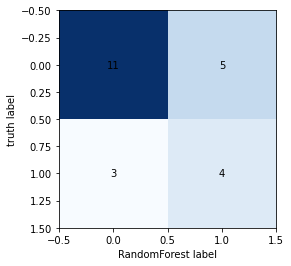

In [144]:
import matplotlib.pyplot as plt
# Visualize it as a heatmap
# Plot confusion matrix
plt.imshow(CM,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("RandomForest label")
plt.ylabel("truth label")
plt.show()

## The code below is specific for DataSet B:

In [145]:
X_train_B = X_train.drop(['S100A8/A9', 'PF4', 'MPO', 'Fractalkine','B-TG','DNA-MPO'], axis='columns')
X_test_B = X_test.drop(['S100A8/A9', 'PF4', 'MPO', 'Fractalkine','B-TG','DNA-MPO'], axis='columns')

In [146]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train_enc = trans.fit_transform(X_train_B)
X_test_enc = trans.fit_transform(X_test_B)
print(X_train_enc)

[[0.         0.7826087  0.57574857 ... 1.         1.         0.        ]
 [0.         0.84782609 0.89269582 ... 1.         0.         0.        ]
 [0.         0.54347826 0.41570397 ... 0.         0.         0.        ]
 ...
 [1.         0.13043478 0.76800564 ... 1.         1.         1.        ]
 [0.         0.80434783 0.55141342 ... 0.         1.         0.        ]
 [1.         0.7826087  0.43012253 ... 1.         1.         0.        ]]


In [147]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True)

In [148]:
print(model.oob_score_)

0.8241758241758241


In [149]:
model.score(X_test_enc,y_test)

0.7391304347826086

In [150]:
features = X_train_B.columns.values
features = features[(features != 'Group')]
coefficients = pd.DataFrame({'Feature': features, 'Weight':model.feature_importances_}, columns=['Feature', 'Weight'])
coefficients = coefficients.sort_values('Weight', ascending = False)
coefficients = coefficients.reset_index()
for i in range(len(coefficients.index)):
    print('Feature %s: %.5f' % (coefficients.at[i,'Feature'], coefficients.at[i,'Weight']))

Feature LDL: 0.11137
Feature BMI: 0.10546
Feature WMH_PVD_ext: 0.08986
Feature SBP: 0.07418
Feature Old_Inf_aanw: 0.07321
Feature Kreat: 0.07068
Feature Trigly: 0.06843
Feature DBP: 0.06772
Feature PVS_BG_ext: 0.06177
Feature leeftijd: 0.06109
Feature Gluc: 0.05818
Feature HDL: 0.04256
Feature Hyperchol: 0.03313
Feature Roken: 0.01512
Feature Hypertensie: 0.01425
Feature MDRD: 0.01287
Feature PVS_CS_ext: 0.01051
Feature geslacht: 0.00948
Feature MB_totaal_aanw: 0.00799
Feature DM: 0.00661
Feature Coronairl: 0.00421
Feature Perifeervaat: 0.00130


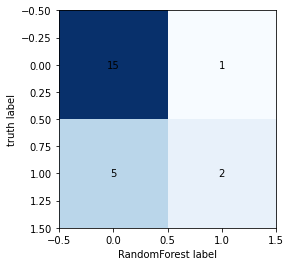

In [151]:
y_pred_test = model.predict(X_test_enc)

CM = confusion_matrix(y_test, y_pred_test)

plt.imshow(CM,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("RandomForest label")
plt.ylabel("truth label")
plt.show()

In [152]:
total1=sum(sum(CM))
#####from confusion matrix calculate accuracy
accuracy1=(CM[0,0]+CM[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.7391304347826086
Sensitivity :  0.9375
Specificity :  0.2857142857142857


## The code below is specific for DataSet C:

In [153]:
X_train_C = X_train.drop(['Old_Inf_aanw','WMH_PVD_ext', 'PVS_BG_ext', 'PVS_CS_ext', 'MB_totaal_aanw'], axis='columns')
X_test_C = X_test.drop(['Old_Inf_aanw','WMH_PVD_ext', 'PVS_BG_ext', 'PVS_CS_ext', 'MB_totaal_aanw'], axis='columns')

In [154]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train_enc = trans.fit_transform(X_train_C)
X_test_enc = trans.fit_transform(X_test_C)
print(X_train_enc)

[[0.         0.7826087  0.57574857 ... 0.31078529 0.08948166 0.4861566 ]
 [0.         0.84782609 0.89269582 ... 0.39075462 0.40951645 0.83207596]
 [0.         0.54347826 0.41570397 ... 0.28235621 0.19861668 0.13303993]
 ...
 [1.         0.13043478 0.76800564 ... 0.39239561 0.07615334 0.22310331]
 [0.         0.80434783 0.55141342 ... 0.31845119 0.06208897 0.24639649]
 [1.         0.7826087  0.43012253 ... 0.40109699 0.04559698 0.38271405]]


In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True)

In [156]:
print(model.oob_score_)

0.6813186813186813


In [157]:
model.score(X_test_enc,y_test)

0.6956521739130435

In [158]:
features = X_train_C.columns.values
features = features[(features != 'Group')]
coefficients = pd.DataFrame({'Feature': features, 'Weight':model.feature_importances_}, columns=['Feature', 'Weight'])
coefficients = coefficients.sort_values('Weight', ascending = False)
coefficients = coefficients.reset_index()
for i in range(len(coefficients.index)):
    print('Feature %s: %.5f' % (coefficients.at[i,'Feature'], coefficients.at[i,'Weight']))

Feature LDL: 0.09421
Feature MPO: 0.08684
Feature BMI: 0.07888
Feature SBP: 0.07706
Feature Kreat: 0.06446
Feature DBP: 0.06222
Feature leeftijd: 0.05623
Feature DNA-MPO: 0.05585
Feature S100A8/A9: 0.05490
Feature PF4: 0.05386
Feature Trigly: 0.05133
Feature Gluc: 0.04973
Feature HDL: 0.04882
Feature B-TG: 0.03951
Feature Hyperchol: 0.03695
Feature Fractalkine: 0.03209
Feature Hypertensie: 0.01664
Feature MDRD: 0.01215
Feature Roken: 0.01032
Feature Coronairl: 0.00669
Feature geslacht: 0.00511
Feature DM: 0.00443
Feature Perifeervaat: 0.00173


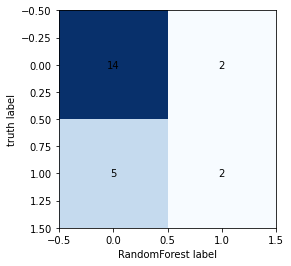

In [159]:
y_pred_test = model.predict(X_test_enc)

CM = confusion_matrix(y_test, y_pred_test)

plt.imshow(CM,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("RandomForest label")
plt.ylabel("truth label")
plt.show()

In [160]:
total1=sum(sum(CM))
#####from confusion matrix calculate accuracy
accuracy1=(CM[0,0]+CM[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.6956521739130435
Sensitivity :  0.875
Specificity :  0.2857142857142857


## The code below is specific for DataSet D:

In [161]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train_enc = trans.fit_transform(X_train)
X_test_enc = trans.fit_transform(X_test)
print(X_train_enc)

[[0.         0.7826087  0.57574857 ... 0.31078529 0.08948166 0.4861566 ]
 [0.         0.84782609 0.89269582 ... 0.39075462 0.40951645 0.83207596]
 [0.         0.54347826 0.41570397 ... 0.28235621 0.19861668 0.13303993]
 ...
 [1.         0.13043478 0.76800564 ... 0.39239561 0.07615334 0.22310331]
 [0.         0.80434783 0.55141342 ... 0.31845119 0.06208897 0.24639649]
 [1.         0.7826087  0.43012253 ... 0.40109699 0.04559698 0.38271405]]


In [162]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score = True)
model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True)

In [163]:
print(model.oob_score_)

0.7582417582417582


In [164]:
model.score(X_test_enc,y_test)

0.782608695652174

In [165]:
features = X_train.columns.values
features = features[(features != 'Group')]
coefficients = pd.DataFrame({'Feature': features, 'Weight':model.feature_importances_}, columns=['Feature', 'Weight'])
coefficients = coefficients.sort_values('Weight', ascending = False)
coefficients = coefficients.reset_index()
for i in range(len(coefficients.index)):
    print('Feature %s: %.5f' % (coefficients.at[i,'Feature'], coefficients.at[i,'Weight']))

Feature MPO: 0.08974
Feature LDL: 0.08087
Feature WMH_PVD_ext: 0.07190
Feature Old_Inf_aanw: 0.07035
Feature PVS_BG_ext: 0.06715
Feature BMI: 0.06546
Feature DBP: 0.06037
Feature DNA-MPO: 0.05166
Feature SBP: 0.04900
Feature Gluc: 0.04498
Feature Trigly: 0.04368
Feature PF4: 0.03882
Feature Kreat: 0.03822
Feature leeftijd: 0.03632
Feature B-TG: 0.03422
Feature S100A8/A9: 0.03370
Feature HDL: 0.03168
Feature Fractalkine: 0.02427
Feature Hyperchol: 0.01676
Feature Hypertensie: 0.01266
Feature MDRD: 0.00875
Feature PVS_CS_ext: 0.00767
Feature Roken: 0.00495
Feature Coronairl: 0.00475
Feature Perifeervaat: 0.00460
Feature geslacht: 0.00285
Feature DM: 0.00260
Feature MB_totaal_aanw: 0.00201


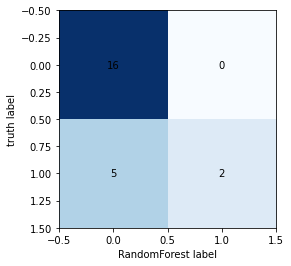

In [166]:
y_pred_test = model.predict(X_test_enc)

CM = confusion_matrix(y_test, y_pred_test)

plt.imshow(CM,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("RandomForest label")
plt.ylabel("truth label")
plt.show()

In [167]:
total1=sum(sum(CM))
#####from confusion matrix calculate accuracy
accuracy1=(CM[0,0]+CM[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = CM[0,0]/(CM[0,0]+CM[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = CM[1,1]/(CM[1,0]+CM[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.782608695652174
Sensitivity :  1.0
Specificity :  0.2857142857142857
